In [1]:
from ImgManager import ImgManager
from CNNModel import CNNModel
from Analyser import Analyser
import time as t
import pandas as pd
import tensorflow as tf
output='output/'
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns', 51)


# 1. Data Preprocessing

### 1.1 Dataset Analysis
Read the original label file and analye the no of images present per class label <br />
The number of images per label is disproportionate. This is a unbalance dataset. <br />
Model might be bias if this dataset is used.<br />
Some adaptation has to be done. <br />
The following is going to be done in data processing:
1. Going to select labels which has more than 10 images
2. For lables which has 9 ot 10 lables, add new images from the ineternet to make it a total of 11 images. New images has file name begins with "new_XXX.jpg"
3. The rest will of the labels will not be considered 


In [2]:
#Create Image manager and perform analysis on labels
imgMan=ImgManager()
df_analyse=imgMan.analyseLabel('trainLabels_bird.csv')
df_analyse

Original number of unique labels: label :77


,label,count
0,Amur_Asian_Paradise_Flycatcher,4
1,Asian_Glossy_Starling,2
2,Asian_Koel,6
3,Banded_Woodpecker,19
4,Black-crowned_Night_Heron,16
5,Black-winged_Kite,20
6,Black_Baza,9
7,Blue-crowned_Hanging_Parrot,13
8,Blue-eared_Kingfisher,3
9,Blue-tailed_Bee-eater,2


### 1.2 Add new images to dataset
1. Create new csv label file wihich has new image name in it
2. Add new images into /birds_dataset/birds folder

In [3]:
#Base on analysis above there are images less than 10 occurrances
#For images which has 9 or 10  occurances, add new images and lables so that the total is 11. 
# New images has file name begins with "new_XXX.jpg"
# The rest will not be considered 
# for deep learning due to insuffient images
# Create Image manager and perform analysis on labels
df_analyse=imgMan.analyseLabel('trainLabels_bird_updated.csv')
df_analyse

Original number of unique labels: label :78


,label,count
0,Amur_Asian_Paradise_Flycatcher,4
1,Asian_Glossy_Starling,2
2,Asian_Koel,6
3,Banded_Woodpecker,19
4,Black-crowned_Night_Heron,16
5,Black-winged_Kite,20
6,Black_Baza,11
7,Blue-crowned_Hanging_Parrot,13
8,Blue-eared_Kingfisher,3
9,Blue-tailed_Bee-eater,2


### 1.3 Display and save used labels into txt file

In [4]:
# if number of bird images  per class is less than 10, it will not be used.
df_approve=imgMan.filterApprovedBirds(df_analyse,10)
df_approve


Number of unique labels to be processed: 38
Total number of images to be processed: 733


,label,count,label_LE
0,Banded_Woodpecker,19,0
1,Black-crowned_Night_Heron,16,1
2,Black-winged_Kite,20,2
3,Black_Baza,11,3
4,Blue-crowned_Hanging_Parrot,13,4
5,Blue-throated_Bee-eater,20,5
6,Blue-winged_Pita,11,6
7,Brahmini_Kite,13,7
8,Buffy_Fish_Owl,15,8
9,Common_Kingfisher,22,9


In [5]:
#Save label to a txt file a output/Labels.txt
# This file will be use in adrroid application in 'assets folder'
imgMan.saveLabelToTxt(output)

### 1.4 Read Images
1. Read images whose labels are approved from birds folder
2. Save the image and labels in string and integer format into an img obj 
3. 11 images from each label will be taken. 10 for training and 1 for testing

In [6]:
#Read images from 'birds' folder and select approve bird labels 
start=t.time()
imgMan.readImages()
end=t.time()
print('Time taken for reading images is '+str(end-start)+" seconds")


Reading images from folder birds ...
Smallest side: 224
Number of overall images: 418
Number of test images: 38
Number of train images: 380
Reading images from folder DONE 

Time taken for reading images is 3.078047037124634 seconds


### 1.5 Process images
1. Resize image to size 224 x 224 pixel
2. For each label filter images to be used for training and test
3. Save the training images to folder 'TrainImg' and test images to folder 'TestImg'

In [7]:
# processing all approve image objects. Each image object 
# will return a resize image . ImageManager will add and 
# filter this images into a list of train and test data
# If an image has more than 10, only a max of 10 is used for training
# to ensure a balanced dataset
#10 images will be used for tarining, 1 image for testing. 
start=t.time()
imgMan.procesImages()
end=t.time()
print('Time taken for image processing is '+str(end-start)+" seconds")

Processing all images... 
Test Images 38
Train Images 380
Processing all images DONE 
Time taken for image processing is 0.964411735534668 seconds


In [8]:
#Return train and test data.
X_Train,y_train,X_Test,y_test=imgMan.get_Train_Test_Data()
print('X_train shape: '+str(X_Train.shape))
print('y_train shape: '+str(y_train.shape))
print('X_test shape: '+str(X_Test.shape))
print('y_test shape: '+str(y_test.shape))


X_train shape: (380, 224, 224, 3)
y_train shape: (380, 38)
X_test shape: (38, 224, 224, 3)
y_test shape: (38, 38)


# 2. Model Training

### 2.1 Model creation and hyper parameter tuning
1. Model MobileNet V2 is used as deployment will be on android device
2. Find best hyperparameter to get highest accuracy using gridsearch cv wth a fold =3

In [9]:
# create the model
cnnMod=CNNModel(imgMan.getSideDimension(),X_Train,y_train,X_Test,y_test,imgMan.getNoOfUniqueOutputs())

In [10]:
#Find the best hyper paramters to get best results
epoch=[8,10]
batSize=[10,50] 
optimizers=['adam']
outAct=['softmax']
hiddenUnit=[256]

dictParam={'epochs':epoch,'batch_size':batSize,'anOptimizer':optimizers,'outActivation':outAct,'hidUnit':hiddenUnit}
start=t.time()
df_full,df_result,bestParam,bestScore,model=cnnMod.findOptimizeParamCV(dictParam,fold=3)
end=t.time()

In [11]:
print('Time taken for grid search is '+str(end-start)+" seconds") # Time taken is approx 12 mins  to find optimize params

Time taken for grid search is 760.0589511394501 seconds


In [12]:
#Print full results of searching for optimize param to output/DF_Full_Result.xlsx
df_full.to_excel(output+"DF_Full_Result.xlsx")

In [13]:
#Print partial results of searching for optimize param to output/DF_Partial_Result.xlsx
df_result.to_excel(output+"DF_Partial_Result.xlsx")
df_result.head()

,params,mean_test_score,std_test_score,rank_test_score
1,"{'anOptimizer': 'adam', 'batch_size': 10, 'epo...",0.923655,0.015012,1
0,"{'anOptimizer': 'adam', 'batch_size': 10, 'epo...",0.923614,0.020004,2
3,"{'anOptimizer': 'adam', 'batch_size': 50, 'epo...",0.784048,0.075110,3
2,"{'anOptimizer': 'adam', 'batch_size': 50, 'epo...",0.715911,0.066376,4


In [14]:
# Show the best parameter to be used after grid search
bestParam
df_param=pd.DataFrame([bestParam])
df_param

,anOptimizer,batch_size,epochs,hidUnit,outActivation
0,adam,10,10,256,softmax


In [15]:
# Show the best score after grid search
print('Best accuracy after grid search on training data: '+str(bestScore))

Best accuracy after grid search on training data: 0.923655370871226


In [16]:
# Evaluating the best model found in grid search using Test data
res=model.score(X_Test,y_test)
print('Accuracy of grid search model on test data: '+str(res))

Accuracy of grid search model on test data: 0.8947368264198303


### 2.2 Train model using best hyperparameter and test using test data

In [17]:
# Train new model with best parameters using full data set using kfold. 
start=t.time()
df_metrics,network,hist=cnnMod.trainModel(bestParam,X_Train,y_train)
end=t.time()
print('Time taken for training model is '+str(end-start)+" seconds")

Time taken for training model is 215.3184871673584 seconds


In [18]:
#Show metrics after training with best parameters
df_metrics

,fold,loss,accuracy,Precision,Recall
0,1,0.236402,0.937008,0.965217,0.874016
1,2,0.004109,1.000000,1.000000,1.000000
2,3,0.002538,1.000000,1.000000,1.000000


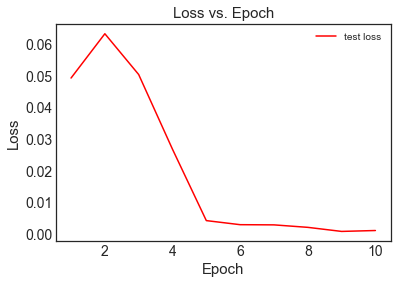

In [19]:
# Display loss vs epoch graph for train Data. See \output\Loss.png
analyser=Analyser(output)
analyser.plot_loss(hist,'Loss') 

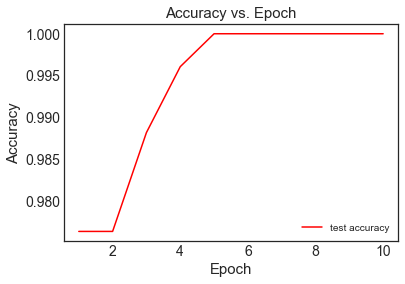

In [20]:
# Display loss vs epoch graph for train Data. See \output\Accuracy.png
analyser.plot_accuracy(hist,'Accuracy')

In [21]:
#Evaluate trained network with test data
param= network.evaluate(X_Test, y_test,batch_size=bestParam.get('batch_size'))

4/4 [==============================] - 1s 126ms/step - loss: 0.6043 - accuracy: 0.8684 - Precision: 0.8919 - Recall: 0.8684


In [22]:
#Print results of test data
print('Test loss:', param[0])
print('Test accuracy:', param[1]*100)
print('Test precision:', param[2]*100)
print('Test recall:', param[3]*100)


Test loss: 0.6043469905853271
Test accuracy: 86.84210777282715
Test precision: 89.18918967247009
Test recall: 86.84210777282715


Correct:
Actual img is: Oriental_Pied_Hornbill
Predicted img is Oriental_Pied_Hornbill

Correct:
Actual img is: Black_Baza
Predicted img is Black_Baza

Correct:
Actual img is: Blue-winged_Pita
Predicted img is Blue-winged_Pita



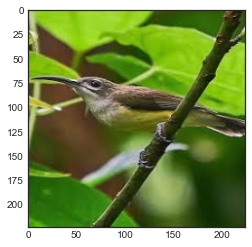

Wrong:
Actual img is: Little_Spiderhunter
Predicted img is Zitting_Cisticola

Correct:
Actual img is: Whooper_Swan
Predicted img is Whooper_Swan

Correct:
Actual img is: Yellow_Bittern
Predicted img is Yellow_Bittern

Correct:
Actual img is: Sunda_Pygmy_Woodpecker
Predicted img is Sunda_Pygmy_Woodpecker

Correct:
Actual img is: Stork-billed_Kingfisher
Predicted img is Stork-billed_Kingfisher

Correct:
Actual img is: Banded_Woodpecker
Predicted img is Banded_Woodpecker

Correct:
Actual img is: Grey-headed_Fish_Eagle
Predicted img is Grey-headed_Fish_Eagle



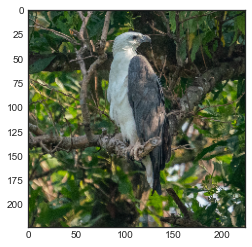

Wrong:
Actual img is: White-bellied_Sea_Eagle
Predicted img is Grey-headed_Fish_Eagle

Correct:
Actual img is: Brahmini_Kite
Predicted img is Brahmini_Kite

Correct:
Actual img is: Black-crowned_Night_Heron
Predicted img is Black-crowned_Night_Heron

Correct:
Actual img is: Common_Kingfisher
Predicted img is Common_Kingfisher

Correct:
Actual img is: Golden-backed_Weaver
Predicted img is Golden-backed_Weaver

Correct:
Actual img is: White-tailed_Sea_Eagle
Predicted img is White-tailed_Sea_Eagle

Correct:
Actual img is: Olive-backed_Sunbird
Predicted img is Olive-backed_Sunbird

Correct:
Actual img is: Lesser_Whistling_Duck
Predicted img is Lesser_Whistling_Duck

Correct:
Actual img is: Zitting_Cisticola
Predicted img is Zitting_Cisticola

Correct:
Actual img is: White-winged_Tern
Predicted img is White-winged_Tern

Correct:
Actual img is: Slaty-breasted_Rail
Predicted img is Slaty-breasted_Rail

Correct:
Actual img is: Blue-crowned_Hanging_Parrot
Predicted img is Blue-crowned_Hanging_P

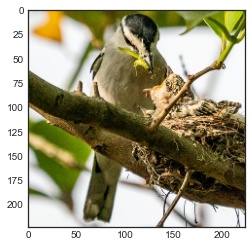

Wrong:
Actual img is: Pied_Triller
Predicted img is Black-winged_Kite



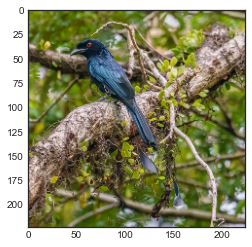

Wrong:
Actual img is: Greater_Racket-tailed_Drongo
Predicted img is Black_Baza

Correct:
Actual img is: Sunda_Scoops_Owl
Predicted img is Sunda_Scoops_Owl

Correct:
Actual img is: Yellow-vented_Bulbul
Predicted img is Yellow-vented_Bulbul



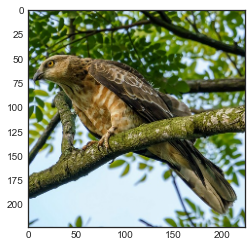

Wrong:
Actual img is: Jerdons_Baza
Predicted img is Black-winged_Kite

Correct:
Actual img is: Red-Crowned_Crane
Predicted img is Red-Crowned_Crane

Correct:
Actual img is: Grey-rumped_Treeswift
Predicted img is Grey-rumped_Treeswift

Correct:
Actual img is: Zanzibar_Red_Bishop
Predicted img is Zanzibar_Red_Bishop

Correct:
Actual img is: Blue-throated_Bee-eater
Predicted img is Blue-throated_Bee-eater

Correct:
Actual img is: Green_Imperial_Pigeon
Predicted img is Green_Imperial_Pigeon

Correct:
Actual img is: Striated_Heron
Predicted img is Striated_Heron

Correct:
Actual img is: Buffy_Fish_Owl
Predicted img is Buffy_Fish_Owl

Correct:
Actual img is: Black-winged_Kite
Predicted img is Black-winged_Kite

Wrong 5
Correct 33


In [23]:
# Validate KERAS model using tst img
# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
wrong,right=0,0
for index,anImage in enumerate(X_Test):
    
    actual = np.argmax(y_test[index])
    actualStr=imgMan.getStrKeyFromVal(actual)
    
    prob = network.predict(np.expand_dims(anImage, axis=0))
    predictIndx = np.argmax(prob)
    predictStr=imgMan.getStrKeyFromVal(predictIndx)
    
    if actual !=predictIndx:
        plt.imshow(anImage)
        plt.show()
        print('Wrong:')
        print('Actual img is: '+ actualStr)
        print('Predicted img is '+predictStr +'\n')
        wrong+=1
    if actual ==predictIndx:
        print('Correct:')
        print('Actual img is: '+ actualStr)
        print('Predicted img is '+predictStr +'\n')
        right+=1
print('Wrong '+str(wrong))
print('Correct '+str(right))


### 2.3 Save model into .tflite format 

In [24]:
import tensorflow as tf
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(network)
tflite_model = converter.convert()
# Save the TF Lite model to output/model.tflite
# This file will be use in adrroid application in 'assets folder'
with tf.io.gfile.GFile(output+'model.tflite', 'wb') as f:
  f.write(tflite_model)

### Test .tflite model using test data
To check if the test results is the same as before conversion

Correct:
Actual img is: Oriental_Pied_Hornbill
Predicted img is Oriental_Pied_Hornbill

Correct:
Actual img is: Black_Baza
Predicted img is Black_Baza

Correct:
Actual img is: Blue-winged_Pita
Predicted img is Blue-winged_Pita



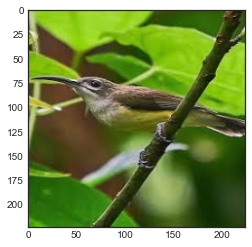

Wrong:
Actual img is: Little_Spiderhunter
Predicted img is Zitting_Cisticola

Correct:
Actual img is: Whooper_Swan
Predicted img is Whooper_Swan

Correct:
Actual img is: Yellow_Bittern
Predicted img is Yellow_Bittern

Correct:
Actual img is: Sunda_Pygmy_Woodpecker
Predicted img is Sunda_Pygmy_Woodpecker

Correct:
Actual img is: Stork-billed_Kingfisher
Predicted img is Stork-billed_Kingfisher

Correct:
Actual img is: Banded_Woodpecker
Predicted img is Banded_Woodpecker

Correct:
Actual img is: Grey-headed_Fish_Eagle
Predicted img is Grey-headed_Fish_Eagle



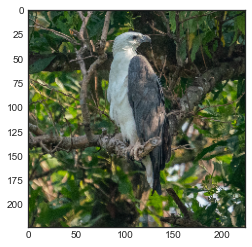

Wrong:
Actual img is: White-bellied_Sea_Eagle
Predicted img is Grey-headed_Fish_Eagle

Correct:
Actual img is: Brahmini_Kite
Predicted img is Brahmini_Kite

Correct:
Actual img is: Black-crowned_Night_Heron
Predicted img is Black-crowned_Night_Heron

Correct:
Actual img is: Common_Kingfisher
Predicted img is Common_Kingfisher

Correct:
Actual img is: Golden-backed_Weaver
Predicted img is Golden-backed_Weaver

Correct:
Actual img is: White-tailed_Sea_Eagle
Predicted img is White-tailed_Sea_Eagle

Correct:
Actual img is: Olive-backed_Sunbird
Predicted img is Olive-backed_Sunbird

Correct:
Actual img is: Lesser_Whistling_Duck
Predicted img is Lesser_Whistling_Duck

Correct:
Actual img is: Zitting_Cisticola
Predicted img is Zitting_Cisticola

Correct:
Actual img is: White-winged_Tern
Predicted img is White-winged_Tern

Correct:
Actual img is: Slaty-breasted_Rail
Predicted img is Slaty-breasted_Rail

Correct:
Actual img is: Blue-crowned_Hanging_Parrot
Predicted img is Blue-crowned_Hanging_P

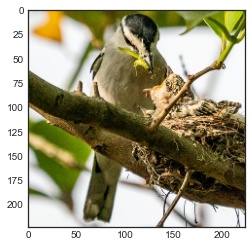

Wrong:
Actual img is: Pied_Triller
Predicted img is Black-winged_Kite



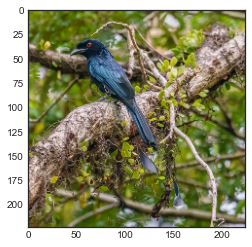

Wrong:
Actual img is: Greater_Racket-tailed_Drongo
Predicted img is Black_Baza

Correct:
Actual img is: Sunda_Scoops_Owl
Predicted img is Sunda_Scoops_Owl

Correct:
Actual img is: Yellow-vented_Bulbul
Predicted img is Yellow-vented_Bulbul



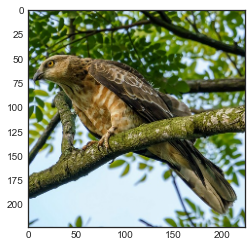

Wrong:
Actual img is: Jerdons_Baza
Predicted img is Black-winged_Kite

Correct:
Actual img is: Red-Crowned_Crane
Predicted img is Red-Crowned_Crane

Correct:
Actual img is: Grey-rumped_Treeswift
Predicted img is Grey-rumped_Treeswift

Correct:
Actual img is: Zanzibar_Red_Bishop
Predicted img is Zanzibar_Red_Bishop

Correct:
Actual img is: Blue-throated_Bee-eater
Predicted img is Blue-throated_Bee-eater

Correct:
Actual img is: Green_Imperial_Pigeon
Predicted img is Green_Imperial_Pigeon

Correct:
Actual img is: Striated_Heron
Predicted img is Striated_Heron

Correct:
Actual img is: Buffy_Fish_Owl
Predicted img is Buffy_Fish_Owl

Correct:
Actual img is: Black-winged_Kite
Predicted img is Black-winged_Kite

Wrong 5
Correct 33


In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Load TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path=output+'model.tflite') 
interpreter.allocate_tensors()
# Get input and output tensors
input_details = interpreter.get_input_details() 
output_details = interpreter.get_output_details()
# Test tflite model file on test data
wrong,right=0,0
for index,anImage in enumerate(X_Test):
    actual = np.argmax(y_test[index])
    actualStr=imgMan.getStrKeyFromVal(actual)

    interpreter.set_tensor(input_details[0]['index'], np.expand_dims(anImage, axis=0))
    interpreter.invoke()
    output_data = interpreter.get_tensor(output_details[0]['index'])
    predicted = np.argmax(output_data)
    predictStr=imgMan.getStrKeyFromVal(predicted)

    if actual !=predicted:
        plt.imshow(anImage)
        plt.show()
        print('Wrong:')
        print('Actual img is: '+ actualStr)
        print('Predicted img is '+predictStr +'\n')
        wrong+=1
    if actual ==predicted:
        print('Correct:')
        print('Actual img is: '+ actualStr)
        print('Predicted img is '+predictStr +'\n')
        right+=1

print('Wrong '+str(wrong))
print('Correct '+str(right))
